## Time Series Analysis 
Using TSA we try to understand the pattern from data points which are ordered over time.

One such example will be applying TSA on stock prices for prediction of future stock price. Here I tried to build a model using the Amazon stock price history from Yahoo finance to evaluate the trends in the stock price.

In [538]:
import numpy as np
import pandas as pd

import yfinance as yf
import pandas_datareader as web
import math

from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import datetime
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')

In [539]:
#data taken from yahoo finance
#Create Ticker variables
yfdata=yf.Ticker("AMZN")
#Set the time range
data=yfdata.history(start=datetime.datetime(2012, 1, 1),end=datetime.datetime.today())
data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,8.7945,8.9740,8.7775,8.9515,102216000,0.0,0.0
2012-01-04 00:00:00-05:00,8.9605,9.0250,8.8035,8.8755,84104000,0.0,0.0
2012-01-05 00:00:00-05:00,8.7970,8.9125,8.7025,8.8805,76182000,0.0,0.0
2012-01-06 00:00:00-05:00,8.9035,9.2325,8.8750,9.1305,140168000,0.0,0.0
2012-01-09 00:00:00-05:00,9.1380,9.2185,8.8500,8.9280,101138000,0.0,0.0


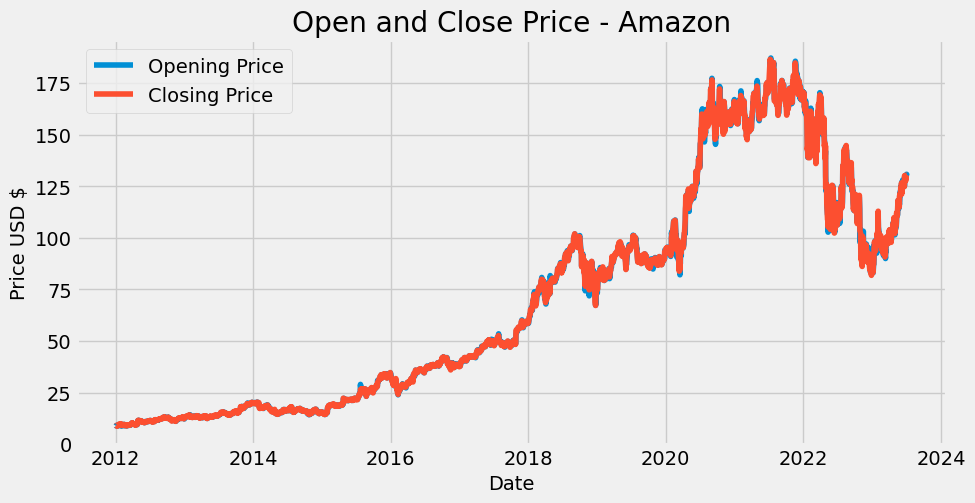

In [540]:
#Visualization of the Closing price
plt.figure(figsize=(10,5))
plt.title("Open and Close Price - Amazon")
plt.plot(data['Open'],label='Opening Price')
plt.plot(data['Close'],label='Closing Price')

plt.xlabel("Date")
plt.ylabel("Price USD $")
plt.legend()
plt.show()

There are our main components in we have to analyze in a time series data
1) Trend:Represents the long-term direction or movement in the data. For example in the amazon stock price data we can see an upward trend. (the 2 other possible trends are downeard and stationary)
2) Seasonal: Represents the periodic fluctuations that occur within the data over a fixed time period. Usually happens annualy. In stocks also, if their product market has any seasonal sale influence it will be reflected in the time series data
3) Cyclical:Represents the long-term fluctuations that occur over a period longer than one season.In this stock prices also we can identify these cyclical fluctuations when economy experience recession, boom etc.
4) random:The unpredictable or random fluctuations that occur in the data. In case of Amazon stock prices, we can find this randomness in the covid period. The stock prices have tremendously increased, probably because of the increased usage of amazon as people preferred social distancing in the period.

In [541]:
'''
df=pd.DataFrame(data['Close'])
df.shape

#Scale the data
scaler=MinMaxScaler(feature_range=(0.1,1))
df['Close']= scaler.fit_transform(df[['Close']])
data=df
'''

#normalization of data leads to 0 values which I cannot perform seasonal decomposition

"\ndf=pd.DataFrame(data['Close'])\ndf.shape\n\n#Scale the data\nscaler=MinMaxScaler(feature_range=(0.1,1))\ndf['Close']= scaler.fit_transform(df[['Close']])\ndata=df\n"

Time series data will be having these trends and seaasonal influences.By decomposing the data we will be able to analyze and understand individual components, such as trend, seasonal, cyclical, and random in the data. We can apply 2 models here additive or multiplicative based on the data trend observation and statistical analysis.

**Additive time series:**<br>
Value = Base Level + Trend + Seasonality + Error

**Multiplicative Time Series:**<br>
Value = Base Level x Trend x Seasonality x Error

Here I believe the data needs to be decomposed through Multiplicative modelling

In [477]:
#Decompose the time series into trend, seasonal, and residual components
#multiplicative
#additive
decomposition=seasonal_decompose(data['Close'], model='multiplicative', period=5)

Since the stock market is open only on Monday-Friday, I selected period as 5. The plot below helps to understand each component more detailed

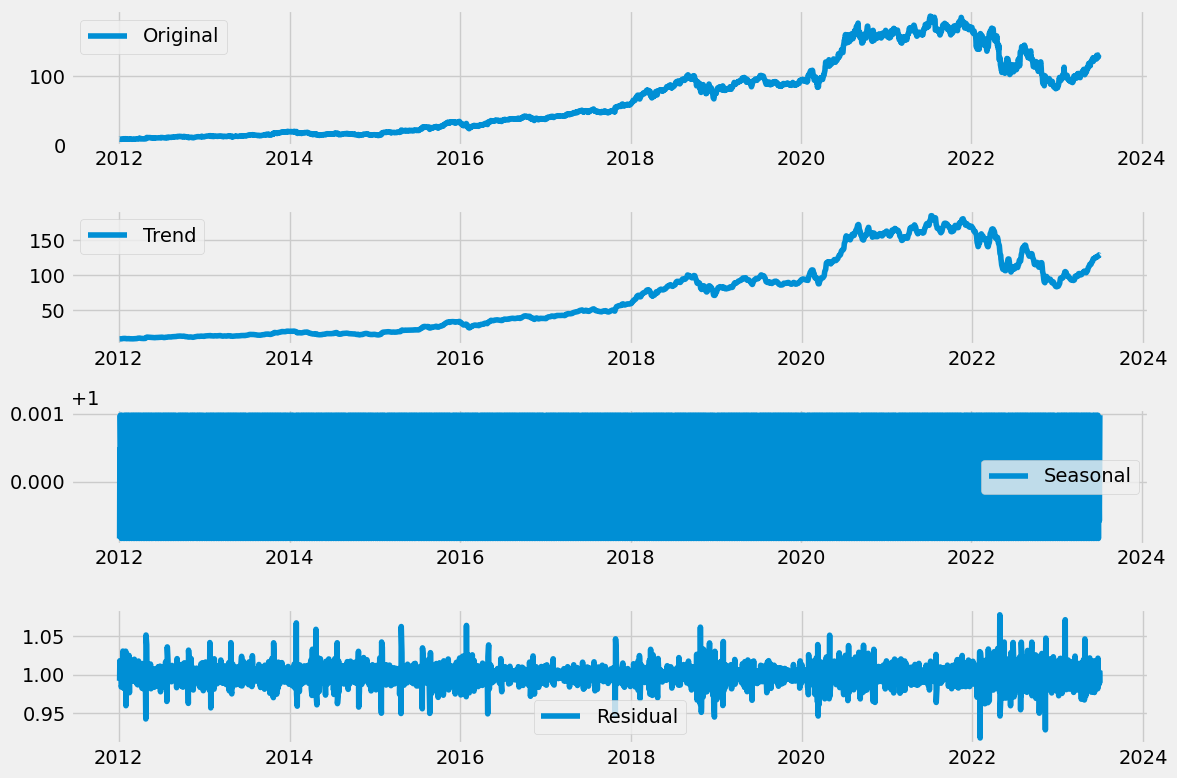

In [478]:
#Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [479]:
#Split the data into training and testing sets
split_ratio=0.9
split_index=int(split_ratio*len(data))
train_data=data[:split_index]
test_data=data[split_index:]


In order to apply time series modelling and analysis, the data must be satisfying **stationarity.**

A stationary series is one where the values of the series is not a function of time. So, the values are independent of time as well as seasonal effects. mean, variance and autocorrelation are also constant over time. Otherwise the data will be counted as **non-stationary time series**

**White Noise**<br> Don't have predictable pattern. It is characterized by having a mean of 0, meaning that on average, the values are centered around zero. White noise does not exhibit any particular trend or structure and is not dependent on time. In stock price also if a sudden change in price happens for one day, because of something, we can charectirize it as White noise. And the random property of TSA covers white noises

In [532]:
#Build the ARIMA model
#The order parameter is defined as (p,d,q)
model=ARIMA(train_data['Close'],order=(3,2,5))
model_fit=model.fit()

In the code above we are applying ARIMA for bulding the time series based prediction of teh Amazon stock prices. 
In buiding the model the order parameter in ARIMA has a huge influence on prediction

The order parameter is defined as (p, d, q), where:

- p represents the order of the Autoregressive (AR) component which is the number of lagged terms of the dependent variable to include in the model. I applied p=3, ie include three lagged terms of the dependent variable 
- d represents the order of the Integrated (I) component and determines the number of times differencing is applied to the time series data to make it stationary. Differencing is performed to remove trends or seasonality from the data. In the model, I passed d=2, which imples differencing is applied 2 times
- q represents the order of the Moving Average (MA) component which is teh number of lagged forecast errors (residuals) to include in the model. Higher the value of q, greater dependence on past forecast errors. Given q=5 means ythe model includes 5 lagged forecast errors

Tuning the order parameters for the best value through experimenting or statistical analysis is important in building the model.


In [533]:
# Make predictions on the testing set
#start_index = test_data.index[0] 
#end_index = test_data.index[-1]  
data_pred=model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)


In [534]:
# Set the index for the predictions
data_pred.index=test_data.index

# Evaluate the model using Mean Squared Error (MSE)
mse= mean_squared_error(test_data['Close'], data_pred)
print('Mean Squared Error (MSE):',mse)


Mean Squared Error (MSE): 226.9368047822882


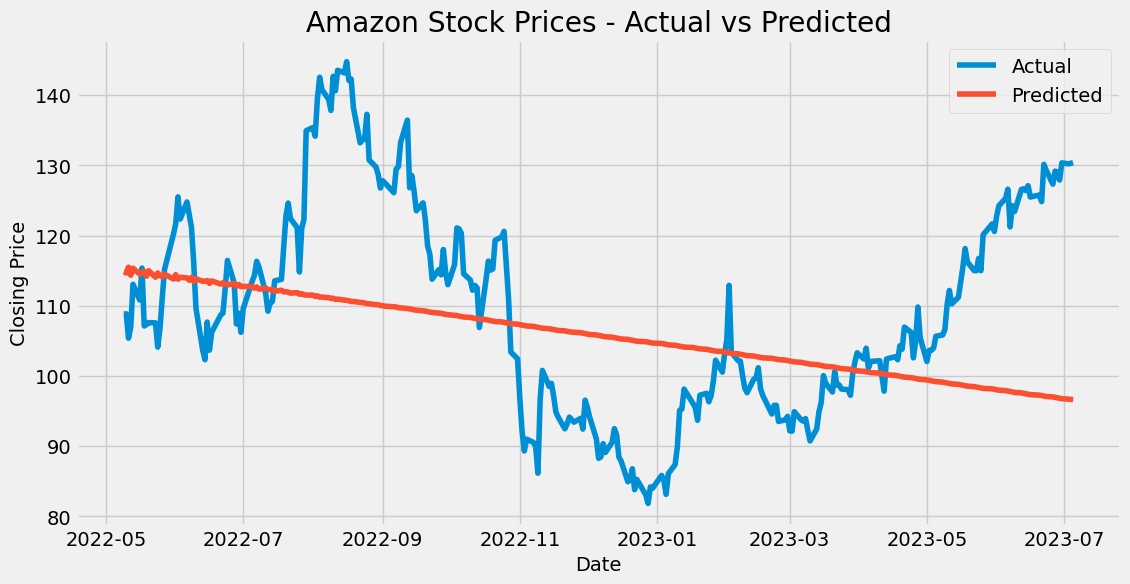

In [536]:
# Visualize the predicted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.plot(test_data.index, data_pred,label='Predicted')
plt.title('Amazon Stock Prices - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

Though the prediction is not accurate enough, the project tries to understand the usability of time seris analysis for the prediction of stock price movement. 